[Permutation importance](https://www.kaggle.com/dansbecker/permutation-importance) 

- fast to calculate
- widely used and understood
- consistent with properties we would want a feature importance measure to have

Usage:
- calcualted after a model has been fitted
- randomly shuffle a single column of the validation data, the performance deterioration measures the importance of the variable
- repeat step 2, until you have calculated the importance of each column

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
data = pd.read_csv('../Datasets/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == 'Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

model = RandomForestClassifier(random_state=0).fit(train_X, train_y)


/home/xma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names=val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


[Partial Dependence](https://www.kaggle.com/dansbecker/partial-plots)
- repeatedly alter the value for one varialbe to make a series of predictions --> for one row
- repeat the experiment with multiple rows from the original dataset
- plot the average outcome on the vertical axis

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [23]:
data = pd.read_csv('../Datasets/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == 'Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)


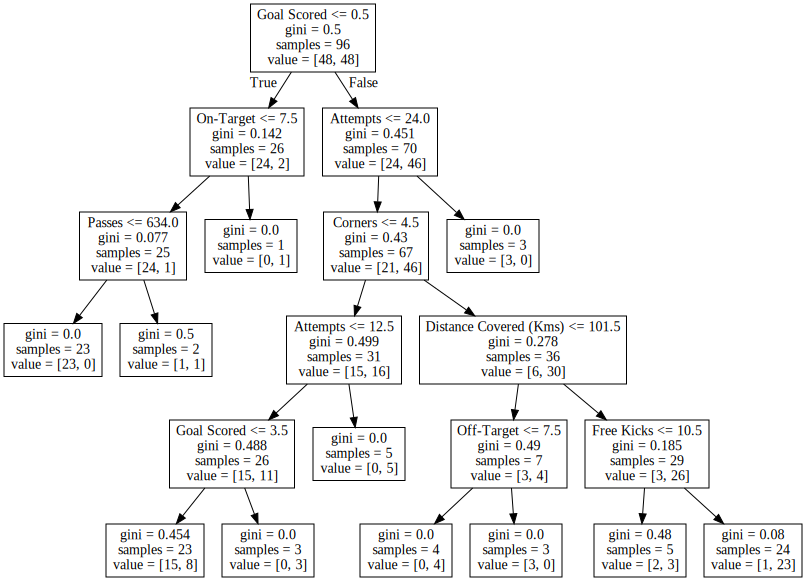

In [24]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

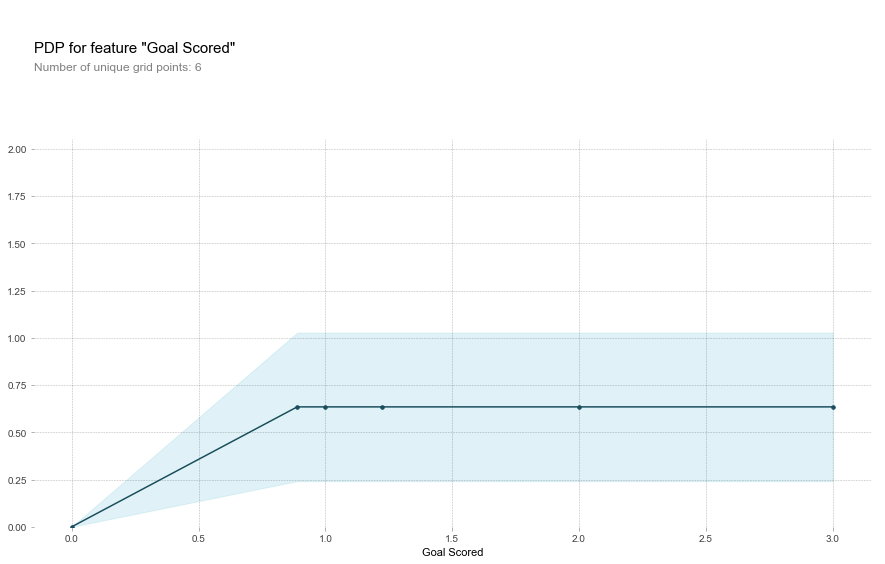

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

- The Y-axis represents the change in prediction from what it would be predicted at the baseline or leftmost value.
- Blue area denotes the confidence interval
- For the ‘Goal Scored’ graph, we observe that scoring a goal increases the probability of getting a ‘Man of the game’ award but after a while saturation sets in.

[SHAP](https://www.kaggle.com/dansbecker/shap-values) values break down a prediction to show the impact of each feature.

Use SHAP values to explain individual predictions



In [32]:
data = pd.read_csv('../Datasets/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == 'Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestClassifier(random_state=0).fit(train_X, train_y)


In [57]:
row_to_show=5
data_for_prediction = val_X.iloc[row_to_show]
data_for_prediction_arr = data_for_prediction.values.reshape(1, -1)
model.predict_proba(data_for_prediction_arr)

array([[0.3, 0.7]])

In [58]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)

In [59]:
shap_values[1]

array([ 0.11623053, -0.05767237, -0.01050023,  0.05671806,  0.00056563,
       -0.02781995,  0.05009299, -0.03722792,  0.03430812,  0.03016995,
       -0.00395719,  0.01650006, -0.01940904,  0.03691749, -0.00062073,
        0.        ,  0.        ,  0.01778793])

In [60]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

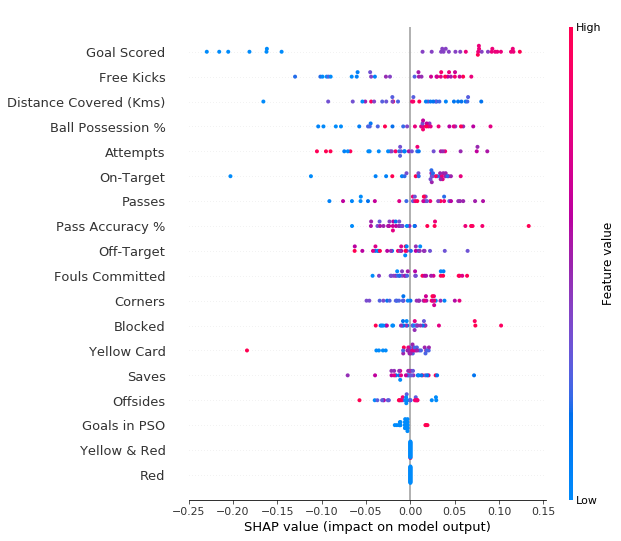

In [63]:
s_values = explainer.shap_values(val_X)
shap.summary_plot(s_values[1], val_X)

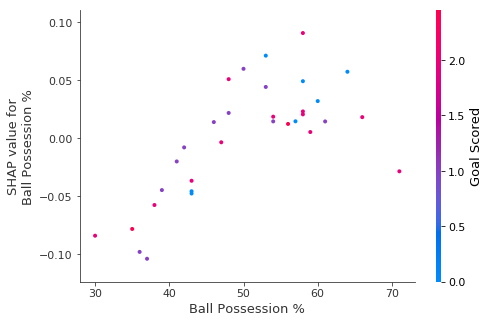

In [65]:
shap.dependence_plot('Ball Possession %', s_values[1], val_X, interaction_index='Goal Scored')